In [3]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load all results of the three models and combine

In [4]:
df1 = pd.read_csv('results/model_1/result.csv', sep=",")
df2 = pd.read_csv('results/model_2/result.csv', sep=",")
df3 = pd.read_csv('results/model_3/result.csv', sep=",")

df = pd.concat([df1, df2, df3], ignore_index=True)
df.head()

,bitflip,model,layer,layerIdx,iteration,image,modifiedBit,valueBefore,valueAfter,accuracy,precision,recall
0,1,models/model_1/weights_model_1.hdf5,conv2d_transpose/kernel:0,20,0,0,0,-1.971665e-33,1.971665e-33,0.880296,0.992085,0.587126
1,1,models/model_1/weights_model_1.hdf5,conv2d_transpose/kernel:0,20,0,1,0,-1.971665e-33,1.971665e-33,0.946147,0.800446,0.959730
2,1,models/model_1/weights_model_1.hdf5,conv2d_transpose/kernel:0,20,0,2,0,-1.971665e-33,1.971665e-33,0.895128,0.994717,0.597582
3,1,models/model_1/weights_model_1.hdf5,conv2d_transpose/kernel:0,20,0,3,0,-1.971665e-33,1.971665e-33,0.534668,1.000000,0.534668
4,1,models/model_1/weights_model_1.hdf5,conv2d_transpose/kernel:0,20,0,4,0,-1.971665e-33,1.971665e-33,0.995904,0.342252,0.956386


In [5]:
df.describe()

,bitflip,layerIdx,iteration,image,modifiedBit,valueBefore,valueAfter,accuracy,precision,recall
count,990000.000000,990000.000000,990000.000000,990000.000000,990000.000000,9.900000e+05,9.900000e+05,990000.000000,990000.000000,990000.000000
mean,2.000000,21.500000,24.500000,24.500000,8.154848,3.970104e-03,4.238945e+34,0.907844,0.771205,0.830339
std,0.816497,12.698432,14.430877,14.430877,9.469273,6.542950e-02,2.496706e+36,0.122098,0.314851,0.281243
min,1.000000,0.000000,0.000000,0.000000,0.000000,-5.033290e-01,-1.192570e+38,0.000000,0.000000,0.000000
25%,1.000000,10.750000,12.000000,12.000000,0.000000,-9.550557e-05,-3.852172e-06,0.881599,0.657866,0.804173
50%,2.000000,21.500000,24.500000,24.500000,5.000000,-2.807713e-33,-6.323753e-34,0.946147,0.930089,0.960969
75%,3.000000,32.250000,37.000000,37.000000,14.000000,1.018900e-32,8.133604e-10,0.980448,0.984111,0.997405
max,3.000000,43.000000,49.000000,49.000000,31.000000,6.944683e-01,2.226360e+38,1.000000,1.000000,1.000000


# Baseline Values

In [6]:
baseline_acc = 0.911
baseline_rec = 0.835
baseline_pre = 0.775

# Accuracy plot

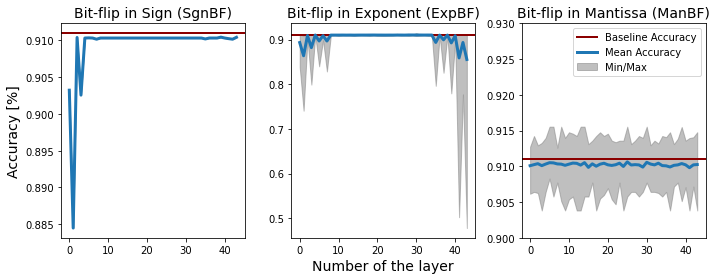

In [8]:
mean = []
minimum = []
maximum = []

fig, ax = plt.subplots(1, 3, figsize=(10, 4))

for i in range(44):
    tmp = df[(df.layerIdx == i) & (df.bitflip == 1)]
    layer_data = tmp[['modifiedBit', 'accuracy']].groupby('modifiedBit').mean().reset_index()
    mean.append(layer_data.accuracy.mean())
    minimum.append(layer_data.accuracy.min())
    maximum.append(layer_data.accuracy.max())

ax[0].axhline(y=0.911, lw=2, ls='-', color='darkred')
ax[0].plot(mean, lw=3)
ax[0].set_ylabel('Accuracy [%]', size=14)
ax[0].fill_between(list(range(44)), maximum, minimum, alpha=0.5, color='gray')
ax[0].set_title('Bit-flip in Sign (SgnBF)', size=14)

mean = []
minimum = []
maximum = []

for i in range(44):
    tmp = df[(df.layerIdx == i) & (df.bitflip == 2)]
    layer_data = tmp[['modifiedBit', 'accuracy']].groupby('modifiedBit').mean().reset_index()
    mean.append(layer_data.accuracy.mean())
    minimum.append(layer_data.accuracy.min())
    maximum.append(layer_data.accuracy.max())


ax[1].axhline(y=0.911, lw=2, ls='-', color='darkred')
ax[1].plot(mean, lw=3)
ax[1].fill_between(list(range(44)), maximum, minimum, alpha=0.5, color='gray')
ax[1].set_title('Bit-flip in Exponent (ExpBF)', size=14)
ax[1].set_xlabel("Number of the layer", size=14)

mean = []
minimum = []
maximum = []

for i in range(44):
    tmp = df[(df.layerIdx == i) & (df.bitflip == 3)]
    layer_data = tmp[['modifiedBit', 'accuracy']].groupby('modifiedBit').mean().reset_index()
    mean.append(layer_data.accuracy.mean())
    minimum.append(layer_data.accuracy.min())
    maximum.append(layer_data.accuracy.max())


ax[2].axhline(y=0.911, lw=2, ls='-', color='darkred', label='Baseline Accuracy')
ax[2].plot(mean, lw=3, label='Mean Accuracy')
ax[2].fill_between(list(range(44)), maximum, minimum, alpha=0.5, color='gray', label='Min/Max')
ax[2].set_title('Bit-flip in Mantissa (ManBF)', size=14)
ax[2].set_ylim([0.9, 0.93])

plt.legend()
plt.tight_layout()
plt.savefig('assets/accuracy-bitflips.pdf', dpi=600)
plt.show()

# Recall Plot

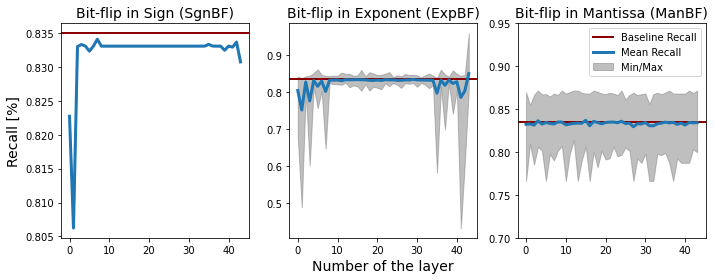

In [10]:
mean = []
minimum = []
maximum = []

fig, ax = plt.subplots(1, 3, figsize=(10, 4))

for i in range(44):
    tmp = df[(df.layerIdx == i) & (df.bitflip == 1)]
    layer_data = tmp[['modifiedBit', 'recall']].groupby('modifiedBit').mean().reset_index()
    mean.append(layer_data.recall.mean())
    minimum.append(layer_data.recall.min())
    maximum.append(layer_data.recall.max())

ax[0].axhline(y=baseline_rec, lw=2, ls='-', color='darkred')
ax[0].plot(mean, lw=3)
ax[0].set_ylabel('Recall [%]', size=14)
ax[0].fill_between(list(range(44)), maximum, minimum, alpha=0.5, color='gray')
ax[0].set_title('Bit-flip in Sign (SgnBF)', size=14)

mean = []
minimum = []
maximum = []

for i in range(44):
    tmp = df[(df.layerIdx == i) & (df.bitflip == 2)]
    layer_data = tmp[['modifiedBit', 'recall']].groupby('modifiedBit').mean().reset_index()
    mean.append(layer_data.recall.mean())
    minimum.append(layer_data.recall.min())
    maximum.append(layer_data.recall.max())


ax[1].axhline(y=baseline_rec, lw=2, ls='-', color='darkred')
ax[1].plot(mean, lw=3)
ax[1].fill_between(list(range(44)), maximum, minimum, alpha=0.5, color='gray')
ax[1].set_title('Bit-flip in Exponent (ExpBF)', size=14)
ax[1].set_xlabel("Number of the layer", size=14)

mean = []
minimum = []
maximum = []

for i in range(44):
    tmp = df[(df.layerIdx == i) & (df.bitflip == 3)]
    layer_data = tmp[['modifiedBit', 'recall']].groupby('modifiedBit').mean().reset_index()
    mean.append(layer_data.recall.mean())
    minimum.append(layer_data.recall.min())
    maximum.append(layer_data.recall.max())


ax[2].axhline(y=baseline_rec, lw=2, ls='-', color='darkred', label='Baseline Recall')
ax[2].plot(mean, lw=3, label='Mean Recall')
ax[2].fill_between(list(range(44)), maximum, minimum, alpha=0.5, color='gray', label='Min/Max')
ax[2].set_title('Bit-flip in Mantissa (ManBF)', size=14)
ax[2].set_ylim([0.7, 0.95])

plt.legend()
plt.tight_layout()
plt.savefig('assets/recall-bitflips.pdf', dpi=600)
plt.show()

# Precision Plot

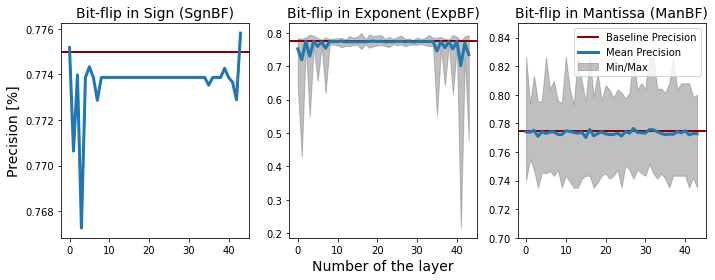

In [12]:
mean = []
minimum = []
maximum = []

fig, ax = plt.subplots(1, 3, figsize=(10, 4))

for i in range(44):
    tmp = df[(df.layerIdx == i) & (df.bitflip == 1)]
    layer_data = tmp[['modifiedBit', 'precision']].groupby('modifiedBit').mean().reset_index()
    mean.append(layer_data.precision.mean())
    minimum.append(layer_data.precision.min())
    maximum.append(layer_data.precision.max())

ax[0].axhline(y=baseline_pre, lw=2, ls='-', color='darkred')
ax[0].plot(mean, lw=3)
ax[0].set_ylabel('Precision [%]', size=14)
ax[0].fill_between(list(range(44)), maximum, minimum, alpha=0.5, color='gray')
ax[0].set_title('Bit-flip in Sign (SgnBF)', size=14)

mean = []
minimum = []
maximum = []

for i in range(44):
    tmp = df[(df.layerIdx == i) & (df.bitflip == 2)]
    layer_data = tmp[['modifiedBit', 'precision']].groupby('modifiedBit').mean().reset_index()
    mean.append(layer_data.precision.mean())
    minimum.append(layer_data.precision.min())
    maximum.append(layer_data.precision.max())


ax[1].axhline(y=baseline_pre, lw=2, ls='-', color='darkred')
ax[1].plot(mean, lw=3)
ax[1].fill_between(list(range(44)), maximum, minimum, alpha=0.5, color='gray')
ax[1].set_title('Bit-flip in Exponent (ExpBF)', size=14)
ax[1].set_xlabel("Number of the layer", size=14)

mean = []
minimum = []
maximum = []

for i in range(44):
    tmp = df[(df.layerIdx == i) & (df.bitflip == 3)]
    layer_data = tmp[['modifiedBit', 'precision']].groupby('modifiedBit').mean().reset_index()
    mean.append(layer_data.precision.mean())
    minimum.append(layer_data.precision.min())
    maximum.append(layer_data.precision.max())


ax[2].axhline(y=baseline_pre, lw=2, ls='-', color='darkred', label='Baseline Precision')
ax[2].plot(mean, lw=3, label='Mean Precision')
ax[2].fill_between(list(range(44)), maximum, minimum, alpha=0.5, color='gray', label='Min/Max')
ax[2].set_title('Bit-flip in Mantissa (ManBF)', size=14)
ax[2].set_ylim([0.7, 0.85])

plt.legend()
plt.tight_layout()
plt.savefig('assets/precision-bitflips.pdf', dpi=600)
plt.show()